In [4]:
import os
os.getcwd()

'c:\\Users\\simhc\\Documents\\GitHub\\oreome\\docs\\jupyters'

(-1.0, 30.0)

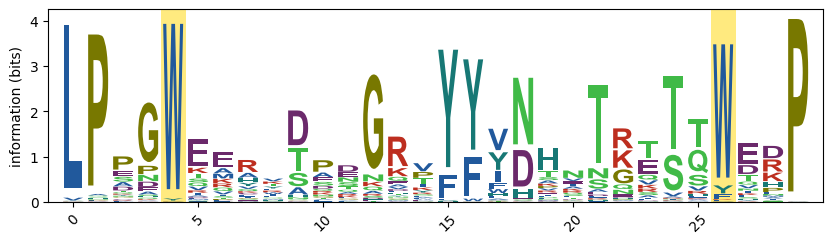

In [1]:
# Tutorial from github
import logomaker

# load ww information matrix
ww_df = logomaker.get_example_matrix('ww_information_matrix',
                                     print_description=False)

# create Logo object
ww_logo = logomaker.Logo(ww_df,
                         font_name='Arial',
                         color_scheme='NajafabadiEtAl2017',
                         vpad=.1,
                         width=.8)

# style using Logo methods
ww_logo.style_xticks(anchor=0, spacing=5, rotation=45)
ww_logo.highlight_position(p=4, color='gold', alpha=.5)
ww_logo.highlight_position(p=26, color='gold', alpha=.5)

# style using Axes methods
ww_logo.ax.set_ylabel('information (bits)')
ww_logo.ax.set_xlim([-1, len(ww_df)])

In [ ]:
# 1단계 혹은 2단계 transformation 을 거쳐야 함.
# counts -> prob, info
# prob -> weight
# weight -> prob
# prob -> info
# info -> prob
# 아마도... prob -> counts 는 prob * size


# Transform information matrix -> probability matrix
prob_mat = logomaker.transform_matrix(ww_df, from_type="information", to_type="probability")
prob_mat.head()

In [ ]:
# My Data Case
# 각 peptide position 0 부터 n 까지의 amino acid count 를 구하고, prob, info로 transform
# 
# 행 : sequence
# 열 : 정보 없음
#
# 아래로 바꾸기
#
# 행 : peptide position
# 열 : amino acid counts


In [ ]:
# Example

import pandas as pd
import numpy as np

# Sample dataframe
data = {
    'sequence': [
        'MQVWPIEGIKKFTRL',
        'LQEGTTVFLLTSRGY',
        'DPYKLRPMIGQLRNK'
    ]
}

df = pd.DataFrame(data)

# Create a new dataframe to store the counts
amino_acids = 'ACDEFGHIKLMNPQRSTVWY'
positions = range(15)
pivot_df = pd.DataFrame(0, index=positions, columns=list(amino_acids))

# Populate the pivot table with counts
for seq in df['sequence']:
    for pos, aa in enumerate(seq):
        pivot_df.at[pos, aa] += 1

print(pivot_df)

## Generate Random Sequence from FASTA (1)

In [ ]:
import numpy as np
import pandas as pd
import logomaker
import random

def read_fasta(file_path):
    sequences = []
    current_sequence = []

    with open(file_path, 'r') as file:
        for line in file:
            line = line.strip()
            if line.startswith('>'):
                if current_sequence:
                    sequences.append(''.join(current_sequence))
                    current_sequence = []
            else:
                current_sequence.append(line)

        if current_sequence:
            sequences.append(''.join(current_sequence))

    return sequences

def calculate_aa_frequencies(sequences):
    amino_acids = 'ACDEFGHIKLMNPQRSTVWY'
    aa_counts = {aa: 0 for aa in amino_acids}
    total_count = 0
    
    for seq in sequences:
        for aa in seq:
            if aa in aa_counts:
                aa_counts[aa] += 1
                total_count += 1

    aa_frequencies = {aa: count / total_count for aa, count in aa_counts.items()}
    return aa_frequencies

def generate_centered_sequences(length, center_aa, aa_frequencies, num_sequences):
    amino_acids = list(aa_frequencies.keys())
    weights = list(aa_frequencies.values())
    
    random_sequences = []
    for _ in range(num_sequences):
        # Generate sequence with center AA as 'K'
        random_sequence = [center_aa if i == length // 2 else random.choices(amino_acids, weights)[0] for i in range(length)]
        random_sequences.append(''.join(random_sequence))
        
    return random_sequences

def calculate_pwm(sequences, length):
    amino_acids = 'ACDEFGHIKLMNPQRSTVWY'
    pwm = np.zeros((length, len(amino_acids)))
    amino_acid_index = {aa: i for i, aa in enumerate(amino_acids)}
    
    for seq in sequences:
        for i, aa in enumerate(seq):
            if aa in amino_acid_index:
                pwm[i, amino_acid_index[aa]] += 1
                
    #pwm = pwm / len(sequences)
    pwm_df = pd.DataFrame(pwm, columns=list(amino_acids))
    return pwm_df

# Example usage
file_path = 'F:/_ProteomicData/(202303)Global_Kac_HFD/logos/Uniprot_mouse_20181213.fasta'
original_sequences = read_fasta(file_path)
aa_frequencies = calculate_aa_frequencies(original_sequences)

sequence_length = 15
num_random_sequences = 5000  # Adjust based on your needs
center_aa = 'K'
random_sequences = generate_centered_sequences(sequence_length, center_aa, aa_frequencies, num_random_sequences)

background_pwm = calculate_pwm(random_sequences, sequence_length)

print("Background Position Weight Matrix (PWM):")
print(background_pwm)

### read fasta, only sequence and counts every "X" amino acid on sequences

In [ ]:
import numpy as np
import pandas as pd


def read_fasta(file_path):
    sequences = []
    current_sequence = []

    with open(file_path, 'r') as file:
        for line in file:
            line = line.strip()
            if line.startswith('>'):
                if current_sequence:
                    sequences.append(''.join(current_sequence))
                    current_sequence = []
            else:
                current_sequence.append(line)

        if current_sequence:
            sequences.append(''.join(current_sequence))

    return sequences

# For all
def count_specific_char(seq, char="K", position=8):
    slice = seq[position-1:-position+1]  # Slice from the N th character to the end
    return slice.count(char)


# For M---
def count_specific_char2(seq, char="K", position=8):
    trimmed_value = seq[1:]
    slice = trimmed_value[position-1:-position+1]  # Slice from the N th character to the end
    return slice.count(char)


# For not start M
def count_specific_char3(seq, char="K", position=8):
    if len(seq) > 15:
        if seq[0] != "M":
            trim = seq[position-1:-position+1]
            count = trim.count(char)
        elif seq[0] == "M":
            trim = seq[1:]
            trim = trim[position-1:-position+1]
            count = trim.count(char)
        else:
            raise ValueError
    else:
        if seq[0] != "M":
            count = seq.count(char)
        elif seq[0] == "M":
            trim = seq[1:]
            count = trim.count(char)
        else:
            raise ValueError
    return count


# Example usage
file_path = 'F:/_ProteomicData/(202303)Global_Kac_HFD/logos/Uniprot_mouse_20181213.fasta'
sequences = read_fasta(file_path)

# Apply the function to each element in the list and calculate the sum of counts
character_counts = [count_specific_char3(seq, char="K", position=8) for seq in sequences]
total_count = sum(character_counts)

# Display the individual counts and the total count
print("Character Counts:", character_counts)
print("Total Count:", total_count)
# count_specific_char : 1253792 / 2 = 626896
# count_specific_char2 : 1251223 / 2 = 626661
# count_specific_char3 : 1251767 / 2 = 625883
# uniprotmouse201812 n(bg) = 636113

Character Counts: [57, 7, 0, 12, 42, 25, 8, 28, 9, 43, 8, 4, 3, 4, 66, 2, 10, 41, 37, 11, 14, 11, 8, 6, 26, 18, 11, 8, 11, 9, 31, 17, 7, 9, 30, 32, 9, 5, 18, 46, 27, 119, 7, 8, 8, 3, 21, 26, 6, 9, 28, 35, 8, 0, 44, 60, 20, 25, 25, 8, 3, 11, 10, 13, 36, 82, 25, 11, 2, 37, 6, 63, 10, 62, 14, 8, 7, 31, 13, 54, 20, 4, 5, 155, 9, 9, 24, 21, 13, 2, 32, 4, 51, 7, 4, 5, 23, 24, 16, 15, 11, 62, 4, 11, 10, 83, 23, 111, 23, 7, 109, 2, 5, 0, 2, 23, 16, 96, 8, 12, 10, 45, 2, 10, 34, 47, 12, 21, 12, 3, 30, 16, 22, 6, 14, 13, 12, 27, 13, 20, 15, 19, 66, 23, 25, 50, 21, 19, 1, 30, 8, 13, 8, 89, 9, 6, 16, 60, 9, 3, 26, 12, 33, 58, 47, 13, 3, 66, 14, 10, 48, 3, 11, 117, 10, 33, 9, 22, 10, 41, 14, 18, 45, 32, 10, 14, 5, 28, 8, 9, 8, 34, 6, 7, 43, 15, 3, 8, 10, 11, 5, 10, 3, 46, 18, 1, 233, 14, 62, 17, 5, 13, 14, 9, 9, 43, 23, 43, 30, 20, 8, 28, 27, 11, 10, 13, 54, 11, 9, 26, 26, 25, 14, 32, 12, 8, 10, 1, 3, 9, 16, 34, 10, 98, 45, 30, 8, 15, 15, 37, 14, 7, 54, 9, 8, 4, 42, 46, 73, 4, 93, 40, 42, 2, 13, 11

In [ ]:
seq = sequences[1]
seq

print(len(seq))


'MTQISEIILLGFGDLHGLQFLLFGLFLAIYVMTLLGNIVILTVVSTDCSLHTPMYFFLGHFSFLEISYTTTIEPVMLWTLLSAHVPISLPACACQFYFFASLVATECFLLAVMSYDRYIAICNPLHYSSIMDSWGCFQLALASWLAGFLAPILLMILIFRLTFCSANEIDHFFCDLKPIMKLACTNTQVAEMTSFICTSLFALGPFILTLASYIHIICTILRIPSTTGKQRAFSTCSSHLIVVSLYYGTLGIVYGFPSMPQYESILKLLSLLYTVFTPAANPIIYTLRNKDVKVALRKLTQWHTYLVKEG'

## counts_mat from aligned sequence

In [14]:
mat['Logo'][0].__len__()

31

C:\Users\simhc\AppData\Local\Temp\ipykernel_22776\1031182945.py:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  L = len(mat.loc[0][0])
c:\Users\simhc\AppData\Local\Programs\Python\Python313\Lib\site-packages\logomaker\src\matrix.py:270: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[0.07906977 0.07066052 0.0795107  0.05945122 0.08446456 0.08258258
 0.07772795 0.08727811 0.08504399 0.1077147  0.09352518 0.08452722
 0.06733524 0.09415121 0.08273894 0.00142653 0.12696148 0.08273894
 0.08844508 0.09142857 0.10028653 0.08034433 0.07060519 0.08225108
 0.06069364 0.07536232 0.0755814  0.09064327 0.10456554 0.07976366
 0.08456973]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  prob_df.loc[:, :] 

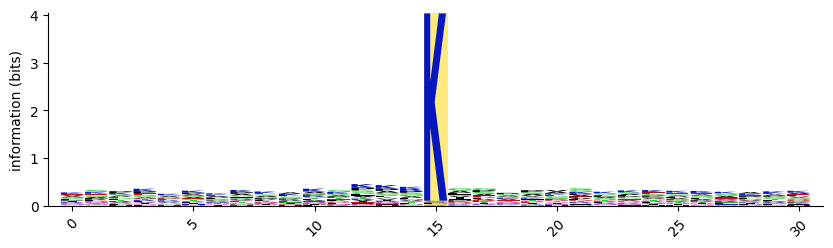

In [35]:
# Sequence to counts_mat
import pandas as pd
import numpy as np
import logomaker

DPATH = 'C:/Users/simhc/OneDrive/Documents/_ProteomicsLAB/_proj/_Co-work/2025_SKKU_kdragon/logos_L31.csv'
# import
mat = pd.read_csv(filepath_or_buffer=DPATH, encoding="utf-8", usecols=[1])
L = len(mat.loc[0][0])

# Create a new dataframe to store the counts
amino_acids = 'ACDEFGHIKLMNPQRSTVWY'
positions = range(L)
counts_mat = pd.DataFrame(0, index=positions, columns=list(amino_acids))

# Populate the pivot table with counts
for seq in mat[mat.columns[0]]:
    for pos, aa in enumerate(seq):
        if aa in amino_acids:
            counts_mat.at[pos, aa] += 1

#counts_mat.head()
# counts_mat to info_mat and display
info_mat = logomaker.transform_matrix(counts_mat, from_type="counts", to_type="information")

my_logo = logomaker.Logo(info_mat)

# style using Logo methods
my_logo.style_xticks(anchor=0, spacing=5, rotation=45)
my_logo.highlight_position(p=int(L/2), color='gold', alpha=.5) # int(L/2) ie. 15/2 -> 7.

# style using Axes methods
my_logo.ax.set_ylabel('information (bits)')
my_logo.ax.set_xlim([-1, L])
my_logo.ax.spines['top'].set_visible(False)
my_logo.ax.spines['right'].set_visible(False)

In [3]:
# weight mat, bg
weight_mat = logomaker.transform_matrix(counts_mat, background=background_pwm, from_type='counts', to_type='weight')
logomaker.Logo(weight_mat)

NameError: name 'background_pwm' is not defined

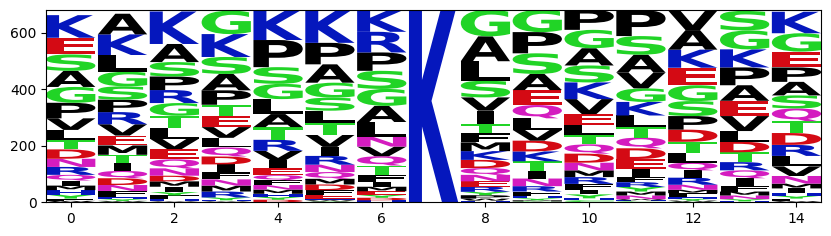

In [3]:
# counts_mat display
logomaker.Logo(counts_mat)

c:\Users\simhc\AppData\Local\Programs\Python\Python313\Lib\site-packages\logomaker\src\matrix.py:394: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[0.08610272 0.10944528 0.09481481 0.08554572 0.06784661 0.09544787
 0.08370044 0.         0.12922173 0.08370044 0.08957416 0.09264706
 0.10176991 0.08124077 0.07121662]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  prob_df.loc[:, :] = df.values / sums[:, np.newaxis]
c:\Users\simhc\AppData\Local\Programs\Python\Python313\Lib\site-packages\logomaker\src\matrix.py:394: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[0.00151057 0.0029985  0.00148148 0.00147493 0.         0.
 0.00146843 0.         0.00146843 0.00293686 0.00881057 0.00441176
 0.00294985 0.         0.00148368]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.


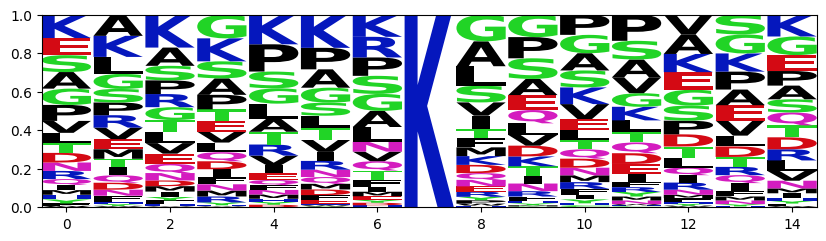

In [4]:
norm_mat = logomaker.transform_matrix(counts_mat, normalize_values=True)
logomaker.Logo(norm_mat)

c:\Users\simhc\AppData\Local\Programs\Python\Python313\Lib\site-packages\logomaker\src\matrix.py:270: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[0.08504399 0.1077147  0.09352518 0.08452722 0.06733524 0.09415121
 0.08273894 0.00142653 0.12696148 0.08273894 0.08844508 0.09142857
 0.10028653 0.08034433 0.07060519]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  prob_df.loc[:, :] = vals / vals.sum(axis=1)[:, np.newaxis]
c:\Users\simhc\AppData\Local\Programs\Python\Python313\Lib\site-packages\logomaker\src\matrix.py:270: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[0.00293255 0.00436681 0.0028777  0.00286533 0.00143266 0.00142653
 0.00285307 0.00142653 0.00285307 0.0042796  0.00998573 0.00571429
 0.00429799 0.00143472 0.00288184]' has dtype incompatible with int64, please explicitly cast to a compatibl

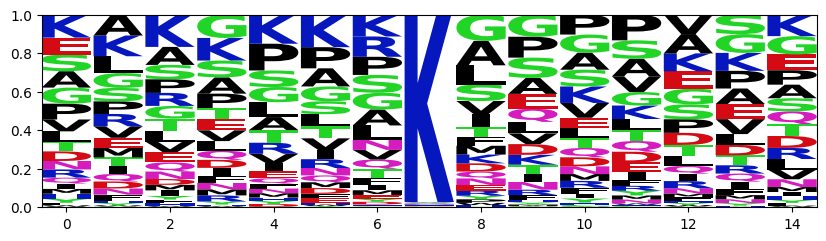

In [5]:
# counts_mat to prob_mat and display
prob_mat = logomaker.transform_matrix(counts_mat, from_type="counts", to_type="probability", pseudocount=1)
logomaker.Logo(prob_mat)

# Logomaker Example from GitHub

(-1.0, 30.0)

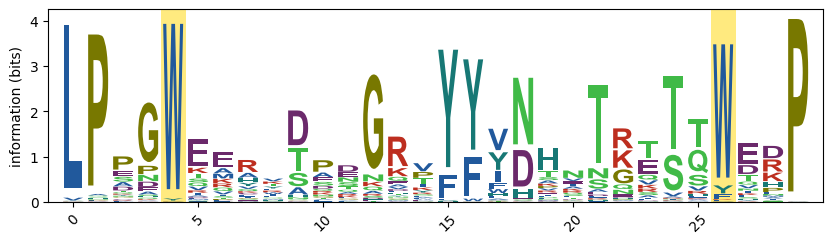

In [6]:
# Tutorial from github
import logomaker

# load ww information matrix
ww_df = logomaker.get_example_matrix('ww_information_matrix',
                                     print_description=False)

# create Logo object
ww_logo = logomaker.Logo(ww_df,
                         font_name='Arial',
                         color_scheme='NajafabadiEtAl2017',
                         vpad=.1,
                         width=.8)

# style using Logo methods
ww_logo.style_xticks(anchor=0, spacing=5, rotation=45)
ww_logo.highlight_position(p=4, color='gold', alpha=.5)
ww_logo.highlight_position(p=26, color='gold', alpha=.5)

# style using Axes methods
ww_logo.ax.set_ylabel('information (bits)')
ww_logo.ax.set_xlim([-1, len(ww_df)])

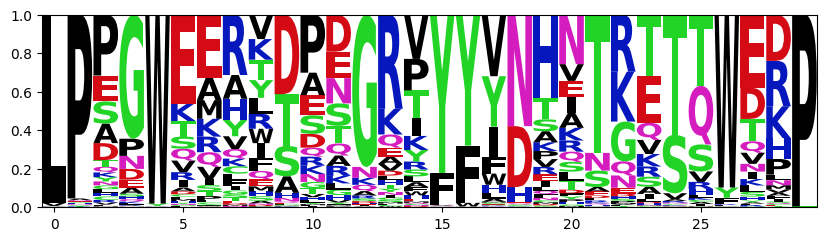

In [9]:
# 1단계 혹은 2단계 transformation 을 거쳐야 함.
# counts -> prob, info
# prob -> weight
# weight -> prob
# prob -> info
# info -> prob
# 아마도... prob -> counts 는 prob * size


# Transform information matrix -> probability matrix
prob_mat = logomaker.transform_matrix(ww_df, from_type="information", to_type="probability")
# prob_mat.head()
logomaker.Logo(prob_mat)

## For figures

#### color scheme
- NajafabadiEtal2017
- charge
- chemistry
- dmslogo_charge
- dmslogo_funcgroup
- hydrophobicity
- skylign_protein
- weblogo_protein

### pseudocount
A small, non-zero value added to counts to avoid taking the logrithmic of zero, which is undefined

Sequnece logos where some amino acids might not appear in certain positions (N/C-term peptide..)

By adding a pseudocount, you ensure that all positions have a non-zero count, which allows for the calculation of probabilities and log-odds scores without encountering mathematical issues.


### matrix
location: C:/Users/simhc/Downloads/mat_temp.csv

cols
- 0 : down      every down
- 1 : down-ss1  KXXXK
- 2 : up        every up
- 3 : up-ss1    GK
- 4 : up-ss2    KT
- 5 : up-ss3    KN
- 6 : up-ss4    KXXG
- 7 : up-ss5    KG
- 8 : up-ss6    KH
- 9 : up-ss7    KW
- 10: up-ss7ss1 DKW
- 11: up-ss8    KXXXA
- 12: up-ss8ss1 KGXXA
- 13: up-ss8ss2 KXXGA


C:\Users\simhc\AppData\Local\Temp\ipykernel_22776\827801769.py:8: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  L = len(mat.loc[0][0])
c:\Users\simhc\AppData\Local\Programs\Python\Python313\Lib\site-packages\logomaker\src\matrix.py:270: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[0.05405405 0.08108108 0.05263158 0.05263158 0.10526316 0.05263158
 0.02631579 0.02631579 0.07894737 0.07894737 0.05263158 0.05263158
 0.02631579 0.10526316 0.10526316]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  prob_df.loc[:, :] = vals / vals.sum(axis=1)[:, np.newaxis]
c:\Users\simhc\AppData\Local\Programs\Python\Python313\Lib\site-packages\logomaker\src\matrix.py:270: FutureWarning: Setting an item of inc

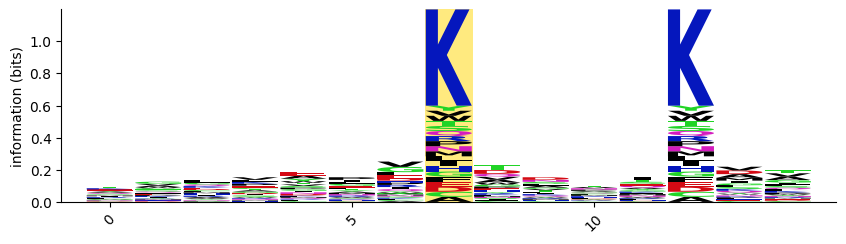

In [34]:
# 정렬된 sequence 불러오기
import numpy as np
import pandas as pd
import logomaker
#import matplotlib.pyplot as plt

mat = pd.read_csv(filepath_or_buffer="F:/_ProteomicData/(202303)Global_Kac_HFD/logos/mat_temp.csv", encoding="utf-8", usecols=[1], keep_default_na=False)
L = len(mat.loc[0][0])

# Create a new dataframe to store the counts
amino_acids = 'ACDEFGHIKLMNPQRSTVWY'
positions = range(L)
counts_mat = pd.DataFrame(0, index=positions, columns=list(amino_acids))

# Populate the pivot table with counts
for seq in mat[mat.columns[0]]:
    for pos, aa in enumerate(seq):
        if aa in amino_acids:
            counts_mat.at[pos, aa] += 1

# # counts_mat display
# norm_mat = logomaker.transform_matrix(counts_mat, normalize_values=True)
# logomaker.Logo(norm_mat, color_scheme='weblogo_protein')

# info_mat display
# counts_mat to info_mat and display
info_mat = logomaker.transform_matrix(counts_mat, from_type="counts", to_type="information")

my_logo = logomaker.Logo(info_mat)

# style using Logo methods
my_logo.style_xticks(anchor=0, spacing=5, rotation=45)
my_logo.highlight_position(p=int(L/2), color='gold', alpha=.5) # int(L/2) ie. 15/2 -> 7.

# style using Axes methods
my_logo.ax.set_ylabel('information (bits)')
my_logo.ax.set_xlim([-1, L])
my_logo.ax.spines['top'].set_visible(False)
my_logo.ax.spines['right'].set_visible(False)

## pseudocount test

In [ ]:
# pseudocount=0.001
prob_mat = logomaker.transform_matrix(counts_mat, from_type="counts", to_type="probability", pseudocount=0.001)
logomaker.Logo(prob_mat)

## Significant motif
needed background